In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("student_habits_performance.csv")
print(df.head())

  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [4]:
sns.set(style="whitegrid") #it is for better visualization
df.isnull().sum() #in place of isna we can also use df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

In [7]:
df.duplicated().sum() #in this we check is there is any duplicate value present or not

np.int64(0)

In [8]:
import warnings
warnings.filterwarnings("ignore") #if there is any warning so not show in screen

In [9]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,20.475248,3.538724,2.504620,1.830363,83.880308,6.474037,3.051705,5.466447,69.558196
std,2.302721,1.469730,1.164802,1.071251,9.453622,1.218943,2.035632,2.857525,16.929436
min,17.000000,0.000000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.000000,2.500000,1.700000,1.000000,77.500000,5.600000,1.000000,3.000000,58.400000
50%,20.000000,3.500000,2.500000,1.800000,84.200000,6.500000,3.000000,5.000000,70.400000
75%,22.000000,4.500000,3.300000,2.600000,90.700000,7.300000,5.000000,8.000000,81.300000
max,24.000000,8.300000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [10]:
df.describe(include="object").columns

Index(['student_id', 'gender', 'part_time_job', 'diet_quality',
       'parental_education_level', 'internet_quality',
       'extracurricular_participation'],
      dtype='object')

In [11]:
categorical_cols=[ 'gender', 'part_time_job', 'diet_quality',
       'parental_education_level', 'internet_quality',
       'extracurricular_participation']

In [12]:
for col in categorical_cols:
    print(f"Value counts for {col}: \n {df[col].value_counts()}") # we count the values of categorical columns

Value counts for gender: 
 gender
Male      440
Female    433
Other      36
Name: count, dtype: int64
Value counts for part_time_job: 
 part_time_job
No     713
Yes    196
Name: count, dtype: int64
Value counts for diet_quality: 
 diet_quality
Fair    396
Good    347
Poor    166
Name: count, dtype: int64
Value counts for parental_education_level: 
 parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64
Value counts for internet_quality: 
 internet_quality
Good       410
Average    352
Poor       147
Name: count, dtype: int64
Value counts for extracurricular_participation: 
 extracurricular_participation
No     620
Yes    289
Name: count, dtype: int64


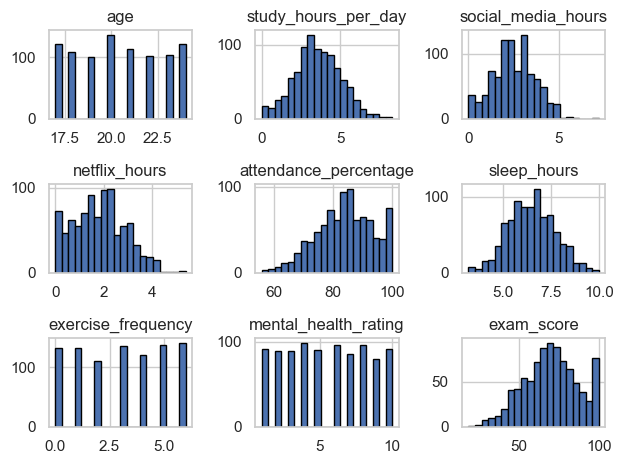

In [13]:
df.hist(bins=20,edgecolor="black") # Data distribution samajhna
plt.tight_layout()
plt.show()

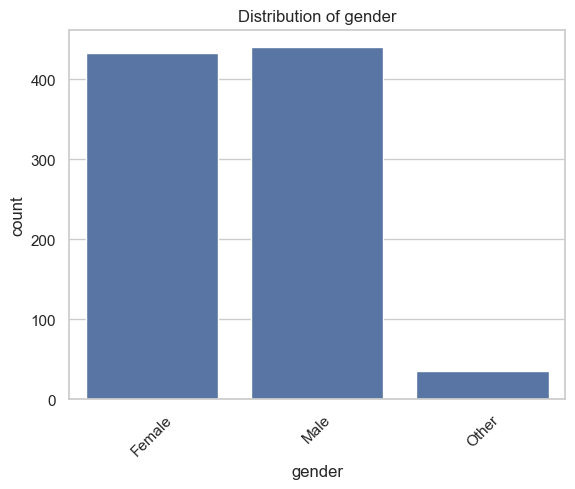

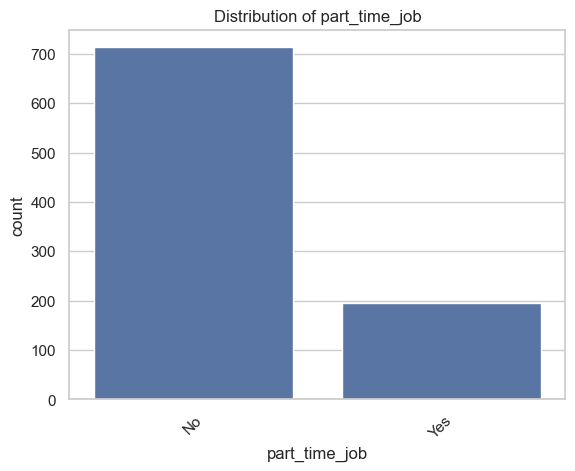

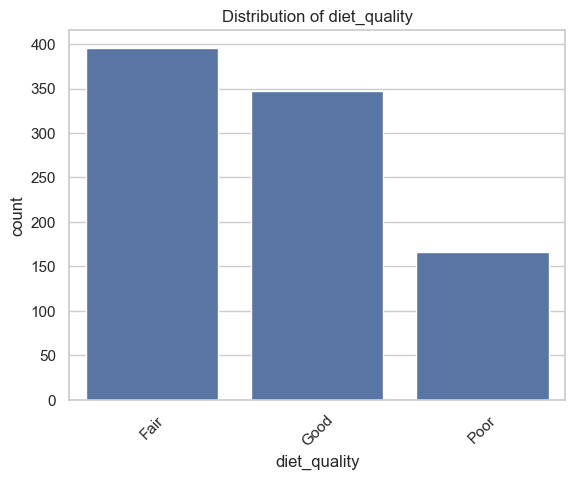

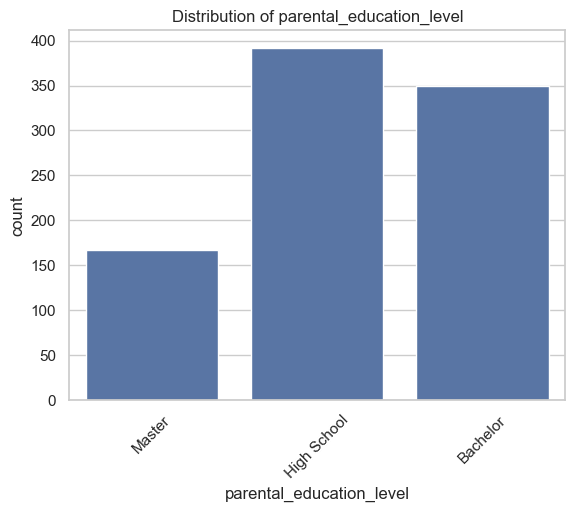

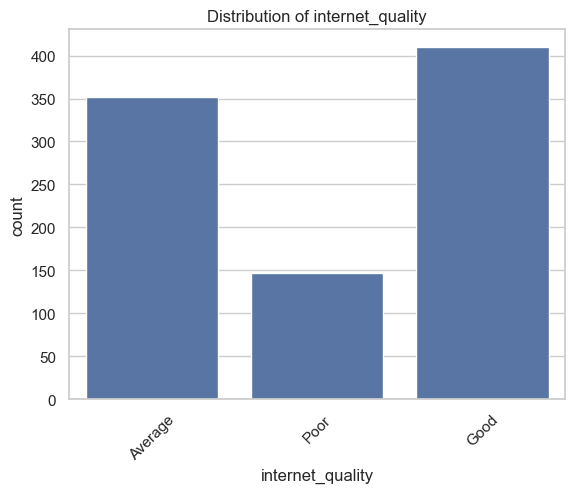

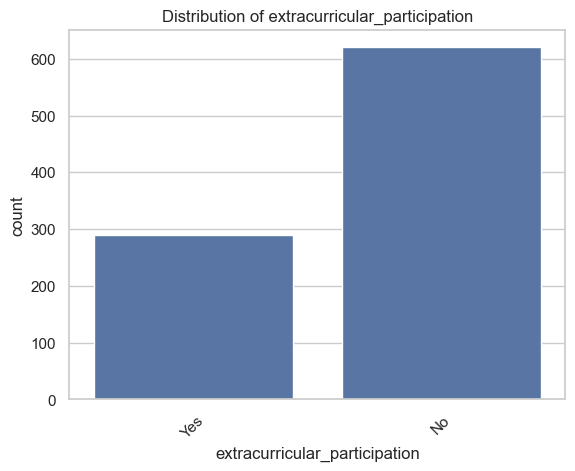

In [14]:
for col in categorical_cols:
    sns.countplot(data=df,x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

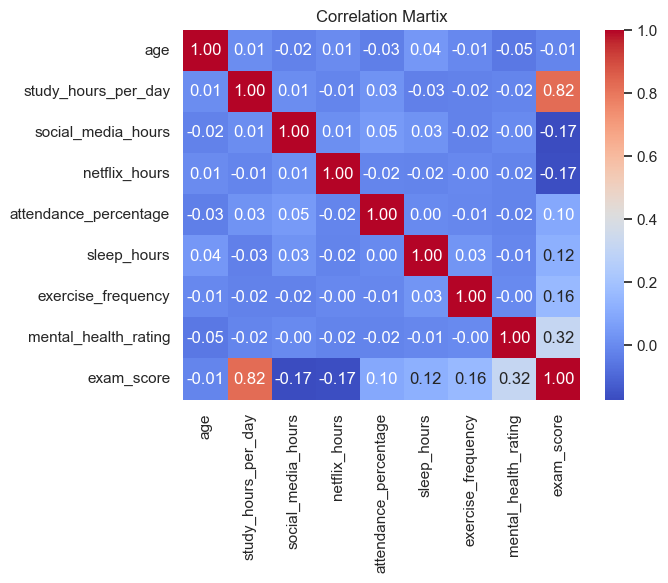

In [15]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Martix")
plt.show()

In [16]:
df.describe().columns

Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'exam_score'],
      dtype='object')

In [17]:
num_features=['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating']

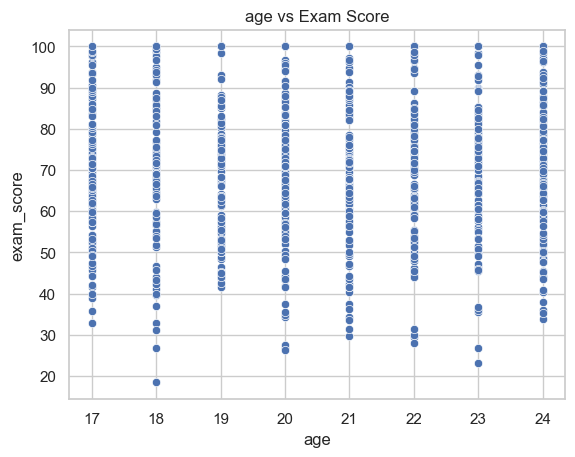

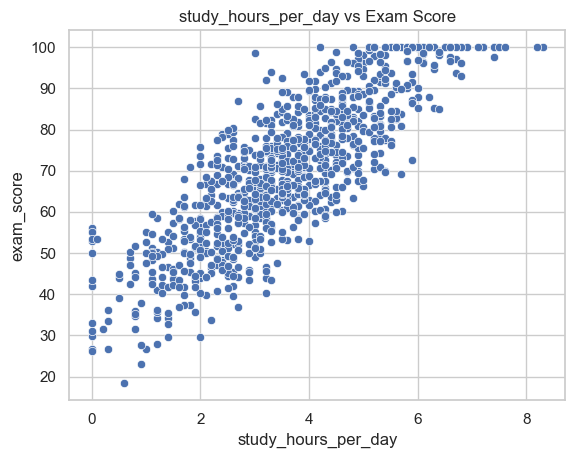

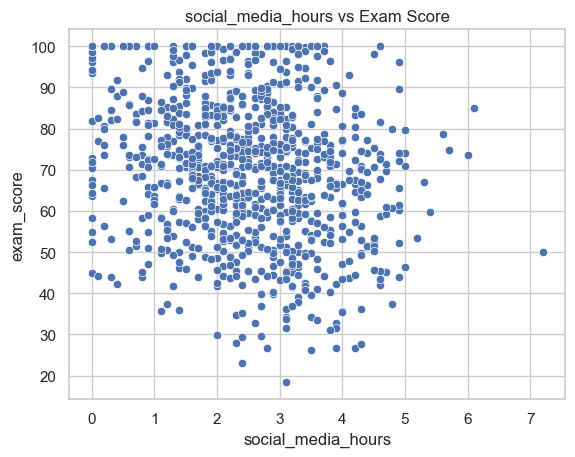

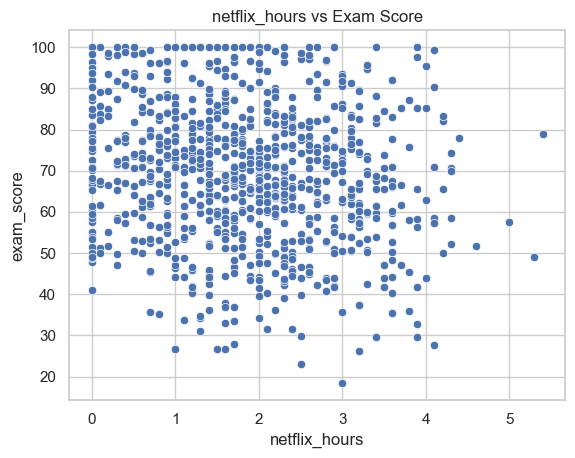

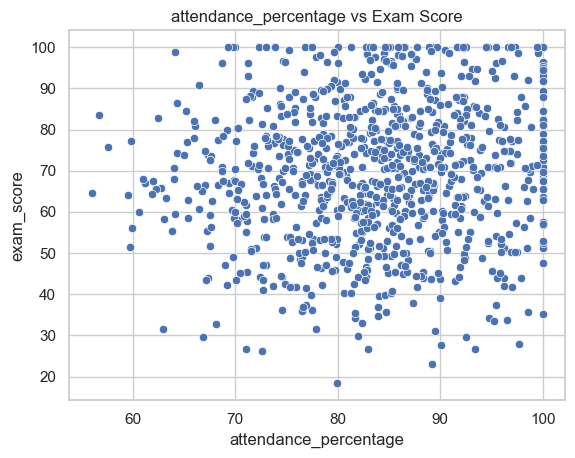

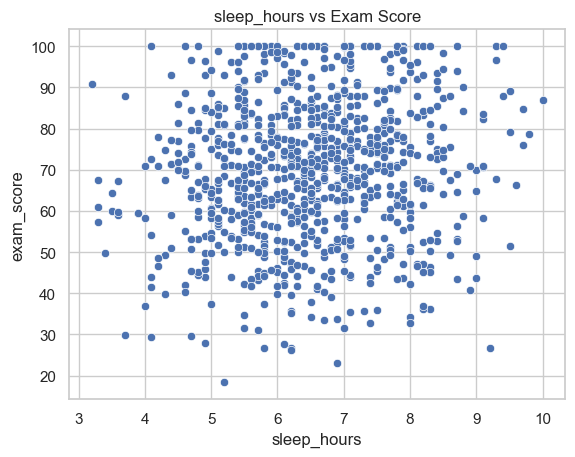

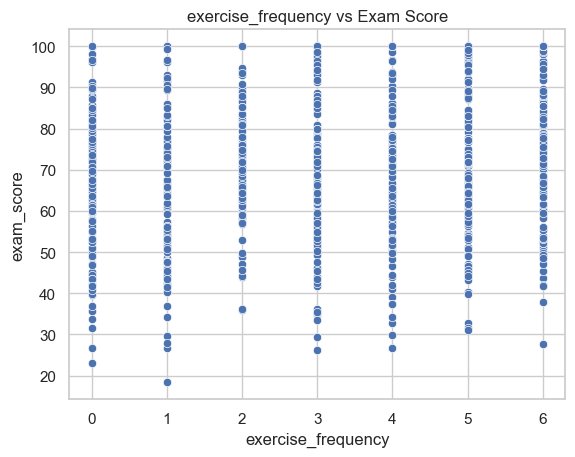

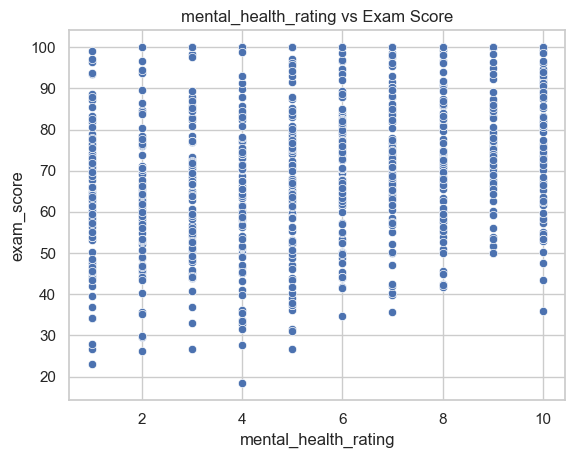

In [18]:
for feature in num_features:
    sns.scatterplot(data=df,x=feature, y="exam_score")
    plt.title(f"{feature} vs Exam Score")
    plt.show()
    

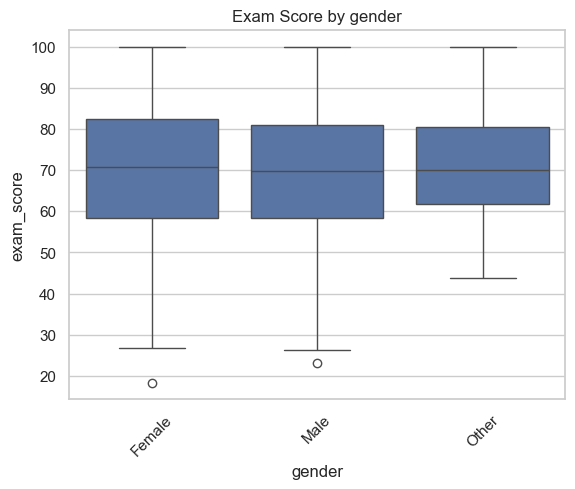

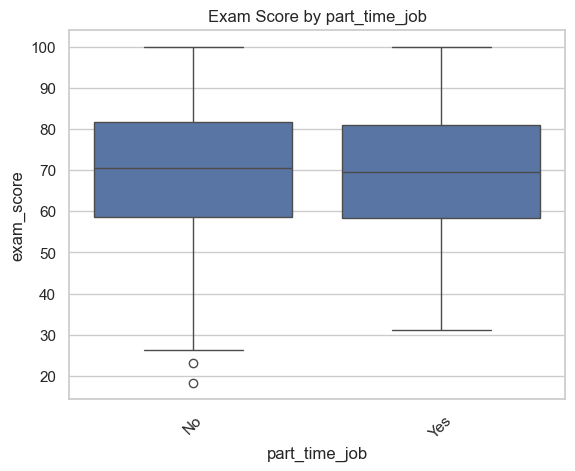

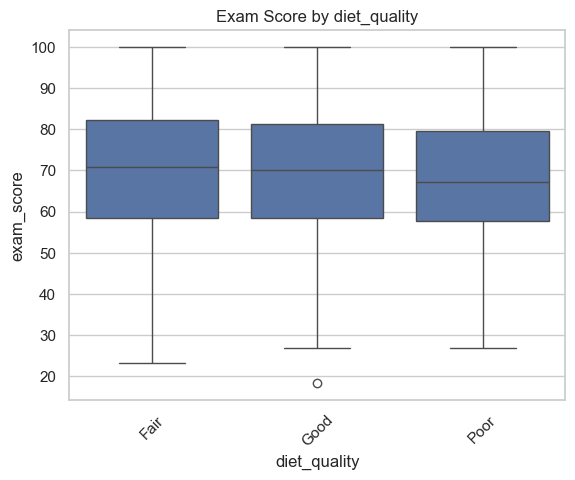

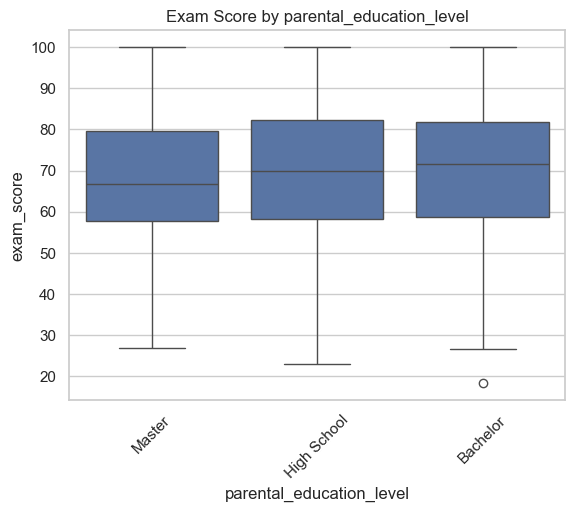

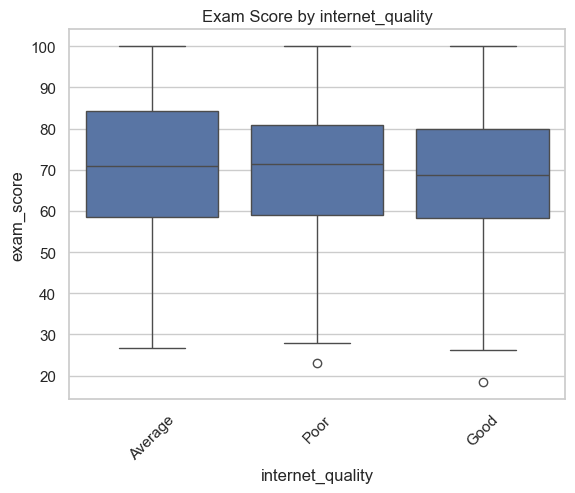

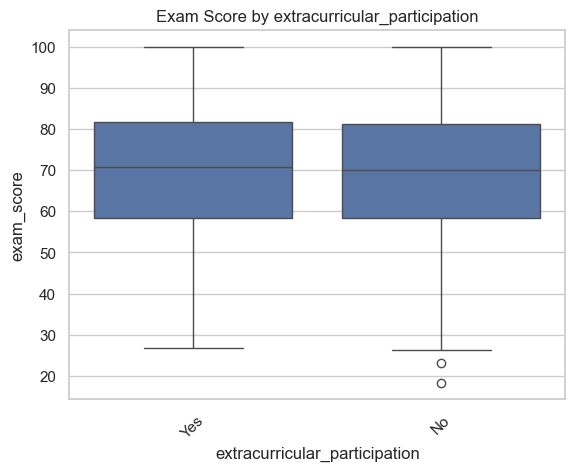

In [19]:
for col in categorical_cols:
    sns.boxplot(data=df,x=col,y="exam_score")
    plt.title(f"Exam Score by {col}")
    plt.xticks(rotation=45)
    plt.show()
    
    

In [20]:
from sklearn.model_selection import train_test_split,GridSearchCV  #for splitting and hyperparameter tuning
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [21]:
df.columns


Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [ ]:
df.head(2)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0


In [22]:
features=["study_hours_per_day","attendance_percentage","mental_health_rating","sleep_hours","part_time_job"]


In [23]:
target="exam_score"


In [24]:
df_model=df[features+[target]].copy()

In [25]:
df_model

,study_hours_per_day,attendance_percentage,mental_health_rating,sleep_hours,part_time_job,exam_score
0,0.0,85.0,8,8.0,No,56.2
1,6.9,97.3,8,4.6,No,100.0
2,1.4,94.8,1,8.0,No,34.3
3,1.0,71.0,1,9.2,No,26.8
4,5.0,90.9,1,4.9,No,66.4
...,...,...,...,...,...,...
995,2.6,77.0,6,7.5,No,76.1
996,2.9,86.0,6,6.8,Yes,65.9
997,3.0,61.9,9,6.5,No,64.4
998,5.4,100.0,1,7.6,Yes,69.7


In [26]:
le=LabelEncoder()

In [27]:
df_model["part_time_job"]=le.fit_transform(df_model["part_time_job"])
df_model

,study_hours_per_day,attendance_percentage,mental_health_rating,sleep_hours,part_time_job,exam_score
0,0.0,85.0,8,8.0,0,56.2
1,6.9,97.3,8,4.6,0,100.0
2,1.4,94.8,1,8.0,0,34.3
3,1.0,71.0,1,9.2,0,26.8
4,5.0,90.9,1,4.9,0,66.4
...,...,...,...,...,...,...
995,2.6,77.0,6,7.5,0,76.1
996,2.9,86.0,6,6.8,1,65.9
997,3.0,61.9,9,6.5,0,64.4
998,5.4,100.0,1,7.6,1,69.7


In [28]:
x=df_model[features]
y=df_model[target]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
len(y_test)

182

In [29]:
len(y_train)

727

In [30]:
models={
    "LinearRegression":{
        "model":LinearRegression(),
        "params":{}
    },
    "DecisionTree" : {
        "model":DecisionTreeRegressor(),
        "params":{"max_depth":[3,4,10],"min_samples_split":[2,5]}
    },
    "RandomForest":{
        "model":RandomForestRegressor(),
        "params":{"n_estimators":[50,100],"max_depth":[5,10]}
    }
}

In [31]:
best_models=[]

In [32]:
for name,config in models.items():
    print(f"Training{name}")

    grid=GridSearchCV(config["model"],config["params"],cv=5,scoring="neg_mean_squared_error")
    grid.fit(x_train,y_train)
    y_pred=grid.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    r2=r2_score(y_test,y_pred)
    best_models.append({
        "model":name,
        "best_params":grid.best_params_,
        "rmse":rmse,
        "r2":r2
    })

    print("Accuracy:",r2)
    

TrainingLinearRegression
Accuracy: 0.8262925603774347
TrainingDecisionTree
Accuracy: 0.7837100185939723
TrainingRandomForest
Accuracy: 0.80878811217302


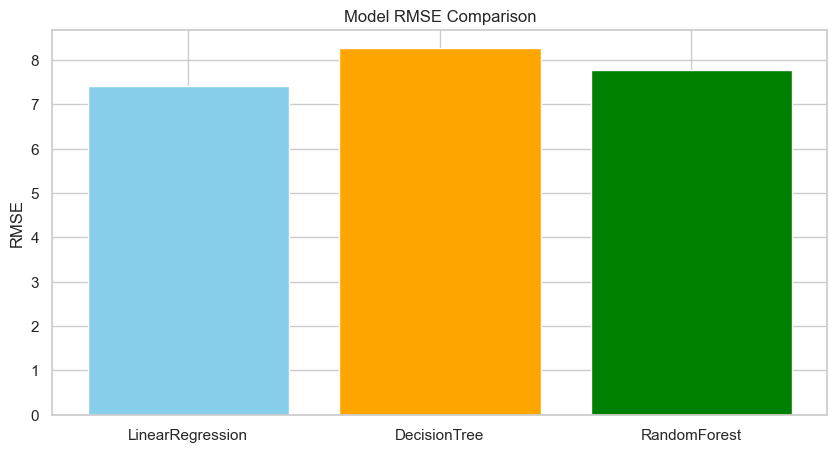

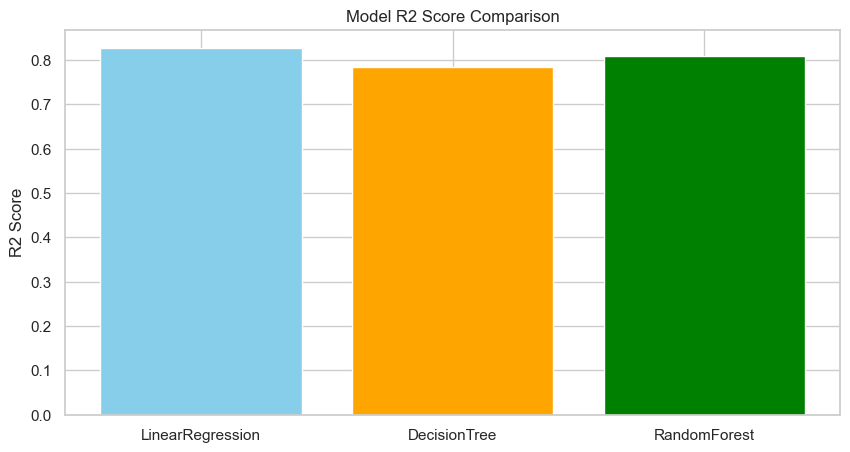

In [34]:
colors = ['skyblue', 'orange', 'green']  # You can add more if you have more models

# Plot RMSE with different colors
plt.figure(figsize=(10,5))
plt.bar(results_df['model'], results_df['rmse'], color=colors)
plt.title("Model RMSE Comparison")
plt.ylabel("RMSE")
plt.show()

# Plot R2 Score with different colors
plt.figure(figsize=(10,5))
plt.bar(results_df['model'], results_df['r2'], color=colors)
plt.title("Model R2 Score Comparison")
plt.ylabel("R2 Score")
plt.show()

In [ ]:
results_df=pd.DataFrame(best_models)

In [ ]:
results_df

,model,best_params,rmse,r2
0,LinearRegression,{},6.775771,0.842506
1,DecisionTree,"{'max_depth': 4, 'min_samples_split': 2}",8.276033,0.765041
2,RandomForest,"{'max_depth': 5, 'n_estimators': 100}",7.238257,0.820272


In [ ]:
import joblib
best_row=results_df.sort_values(by="rmse").iloc[0]
best_row

model          LinearRegression
best_params                  {}
rmse                   6.775771
r2                     0.842506
Name: 0, dtype: object

In [ ]:
best_model_name=best_row["model"]
best_model_name

'LinearRegression'

In [ ]:
best_model_config=models[best_model_name]
best_model_config


{'model': LinearRegression(), 'params': {}}

In [ ]:
final_model=best_model_config["model"]
final_model.fit(x,y)

LinearRegression()

In [ ]:
joblib.dump(final_model,"best_model.pkl")

['best_model.pkl']

In [ ]:
joblib.load("best_model.pkl").predict(x_test)

array([ 64.05479374,  66.0866954 ,  89.38708519,  98.48292768,
        80.04701348,  73.73470842,  74.26344109,  81.50258474,
        72.45303949,  53.93516025,  83.47702877,  73.06952749,
        52.04571946,  73.87388264, 102.20707529,  57.44126378,
        54.20184513,  40.22731221,  77.0077602 ,  68.8414418 ,
        77.38615468,  74.07300984,  71.74445088,  58.73539837,
        79.68363838,  58.99100986, 105.61559246,  91.91388896,
        65.81297953,  57.98249864,  46.52666247,  52.63399438,
        83.72423392,  71.00132175,  74.89289694,  81.55564529,
        50.74268471,  72.25779551,  98.07031515,  51.88362859,
        76.84828965,  34.72601698,  79.94294863,  93.29678994,
        72.93089446,  57.63384029,  63.00446683,  89.92801771,
        70.40477667,  62.91212161,  63.24170396,  61.88623029,
        72.9566029 ,  85.31749649,  54.28921371,  74.1183648 ,
        65.92873416,  60.6209758 ,  55.66431716,  72.24230521,
        70.24515583,  79.30877704,  53.13689169,  66.59